# Integrales

Importación de las librerías necesarias

In [1]:
import numpy as np # biblioteca de cálculo numérico y análisis de datos
import pylab as plt # biblioteca para la generación de gráficos a partir de listas o arrays
from sympy import * # Librería de Cálculo
from sympy.plotting import plot as symplot # Librería para los gráficos
from sympy.abc import x, y, h # Carga de un simbólico "x"
from sympy.plotting.pygletplot import PygletPlot as Plot # Librería para los gráficos
import math

## Definición de área bajo una curva

Dada la gráfica de una función, se puede definir la integral definida como el área bajo la función entre dos valores $a$ y $b$.


Así por ejemplo para la función
$cos(2πx)e^{-x}+1$ entre los valores $1$ y $4$ se puede representar como


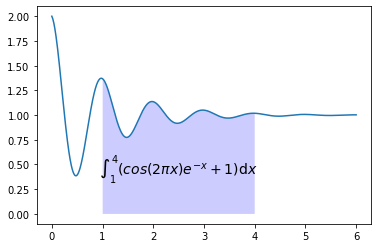

In [ ]:
from matplotlib import pyplot as plt

a=0
b=6
n=1000

# Creamos la función simbólica
f = cos(2*pi*x)*exp(-x)+1
# Definimos los subintervalos entre a y b como n valores espaciados uniformemente
xvalues = np.linspace(a,b,n)
# Obtenemos los valores correspondientes para la y
yvalues = lambdify(x, f)(xvalues)

plt.plot(xvalues,yvalues)     # Dibujamos la curva a partir de sus coordenadas x, y
# Rellenamos el área de integración en color azul
plt.fill_between(xvalues,y1=yvalues,y2=0,where=(xvalues>=1)&(xvalues<=4), facecolor='blue',alpha=0.2)
# Añadimos un texto explicativo en la posición (2.5, 0.4)
plt.text(2.5,0.4,r"$\int_{1}^4(cos(2πx)e^{-x}+1)\mathrm{d}x$",horizontalalignment='center',fontsize=14)
plt.show()

Una forma de calcular una aproximación del área bajo una curva sería mediante una suma finita. De esta forma, se define la Suma de Riemann como una  aproximación del valor de una integral mediante una suma finita.

La suma se calcula dividiendo la región en formas (rectángulos, trapezoides, cuadrados, polinomios cuadráticos o cúbicos, etc.) que si las juntamos todas se forma un zona similar a la región que se está midiendo. Después, calculando el área para cada una de estas formas y sumåndolas todas, se puede encontrar una aproximación numérica para una integral definida.  

Hay que tener en cuenta que la región rellenada por las formas pequeñas generalmente no es exactamente la misma forma que la región que se está midiendo, con lo que la suma de Riemann será una aproximación diferente del área que se está midiendo. El error que se comete, se puede reducir utilizando formas cada vez más pequeñas. Así, a medida que las formas se hacen cada vez más pequeñas, la suma se acerca a la integral buscada.

Una de las formas más simples es el rectángulo. Así pues, vamos a aproximar el área bajo la curva mediante una suma de áreas de rectángulos. Para ello, primeramente, vamos a realizar una partición del intervalo $[a, b]$ en $n$ particiones de longitud $\Delta x$.

Para calcular la altura de los rectángulos vamos a elegir dos valores el valor de la función en el punto inicial izquierdo y el valor en el punto final derecho de cada elemento de la partición. Estas sumas de las áreas de esos rectángulos se denominarán suma izquierda en un caso, y suma derecha en el otro.

Así pues, tomando cada intervalo de igual longitud $\Delta x = \frac{(b-a)}{n}$, con $n$ número de intervalos definidos mediante la partición $\{a=x_1, x_2, \ldots,x_n,x_{n+1}=b\}$, y tomando como alturas de los rectángulos los valores de $f(x_{i})$ y $f(x_{i+1})$ respectivamente, se obtienen las áreas de los rectángulos.

Ahora solo queda sumar las áreas de los rectángulos para obtener una aproximación, así la Suma Izquierda será

$$L_n = \sum_{i=1}^n \Delta x f(x_{i}) = \Delta x  \sum_{i=1}^n f(x_{i}) = \frac{b-a}{n} \sum_{i=1}^n f(x_{i}),$$

y la Suma Derecha

$$R_n = \sum_{i=1}^n \Delta x f(x_{i+1}) = \Delta x  \sum_{i=1}^n f(x_{i+1}) = \frac{b-a}{n} \sum_{i=1}^n f(x_{i+1}) $$

Esto se puede implementar en python de la forma siguiente

In [ ]:
# Función que calcula la suma izquierda donde
# function: función a integrar de forma simbólica
# a: límite inferior de integración
# b: límite superior de integración
# n: número de intervalos entre a y b

def L_n(function, a, b, n):
    xvalues = np.linspace(a, b, n) # Devuelve n valores espaciados uniformemente en el intervalo [a, b]

    # Obtenemos los valores correspondientes a f(xi)
    yvalues = lambdify(x, function)(xvalues[:-1])

    Lsum = 0
    for i in yvalues:
        Lsum += i

    Ax = (b-a)/n
    Lsum = Ax * Lsum

    return Lsum

# Función que calcula la suma derecha
def R_n(function, a, b, n):
    xvalues = np.linspace(a, b, n) # Devuelve n valores espaciados uniformemente en el intervalo [a, b]

    # Obtenemos los valores correspondientes a f(xi+1)
    yvalues = lambdify(x, function)(xvalues[1:])

    Rsum = 0
    for i in yvalues:
        Rsum += i

    Ax = (b-a)/n
    Rsum = Ax * Rsum

    return Rsum

# La siguiente función llama a las dos anteriores y devuelve una tupla con sus valores
def Riemann_sum(function, a, b, n):
     Ln = L_n(function, a, b, n)
     Rn = R_n(function, a, b, n)
     return (Ln, Rn)

## ejemplo
n = 10 #100
a = 0
b = np.pi

function = sin(x)**2 * x**2 * 10**-x
Ln, Rn = Riemann_sum(function, a, b, n)

print(f"La Suma Izquierda de: {function} de {a:.2f} a {b:.2f} es {Ln:.6f}")
print(f"La Suma Derecha   de: {function} de {a:.2f} a {b:.2f} es {Rn:.6f}")

La Suma Izquierda de: 10**(-x)*x**2*sin(x)**2 de 0.00 a 3.14 es 0.089965
La Suma Derecha   de: 10**(-x)*x**2*sin(x)**2 de 0.00 a 3.14 es 0.089965


También podemos usar la regla trapezoidal que consiste en aproximar la altura de la función a una constante en cada subintervalo $[a,b]$ como si fuera un polinomio lineal.  En este caso, la región bajo el polinomio lineal es un  trapezoide.

En cada sub-intervalo $x_{i}$ y $x_{i+1}$, el trapezoide tiene de área
$$\frac{f(x_{i})+ f(x_{i+1})}{2}\Delta x $$

Y sumando estas áreas en todos los sub-intervalos obtenemos:

$$\int_a^b f(x)dx = \sum_{i=1}^n \frac{f(x_i)+f(x_{i+1})}{2}\Delta x $$

Esto se puede implementar fácilemente en python mediante el siguiente código


In [ ]:
def suma_trapezoidal(function, a, b, n):
    Ax = (b - a)/n

    xvalues = np.linspace(a, b, n) # Devuelve n valores espaciados uniformemente en el intervalo [a, b]

    # Obtenemos los valores de f(xi+1)
    yvalues = lambdify(x, function)(xvalues)

    sum = 0
    for i in range(len(yvalues)-1):
      sum += (yvalues[i]+yvalues[i+1])/2

    sum = Ax * sum

    return sum

n= 100
a = 0
b = np.pi

f = sin(x)**2 * x**2 * 10**-x

STn = suma_trapezoidal(f, a, b, n)
print(f"La Suma Trapezoidal de: {f} de {a} a {b:.2f} es {STn:.6f}")


La Suma Trapezoidal de: 10**(-x)*x**2*sin(x)**2 de 0 a 3.14 es 0.098944


## Cálculo de integrales en Python

Para calcular integrales definidas, la librería *scipy* proporciona un comando de cálculo inmediato *quad*. Este comando devuelve una tupla cuyo primer elemento es el valor de la integral y tiene la sintaxis siguiente
*quad(función, a, b)*

In [1]:
import numpy as np
from sympy import * # Librería de Calculo
from sympy.plotting import plot as symplot # Librería para las gráficas
from sympy.abc import x, y, z, h # Carga de un simbolico "x"
from sympy.plotting.pygletplot import PygletPlot as Plot # Librería para las gráficas
from scipy.integrate import quad




In [3]:
# scipy es una biblioteca de herramientas y algoritmos matemáticos, entre ellos quad para calcular integrales
from scipy.integrate import quad

# Necesitamos definir una función de usuario para poder utilizar la función quad
# Como mínimo, incluirá el argumento x
def integrand(x):
    return x**2+x+1

a=0
b=3
J = quad(integrand,a,b)
J # Tupla valor del integral y error absoluto

(16.5, 1.8318679906315083e-13)

Con Python, se pueden resolver integrales indefinidas de forma simbólica con la ayuda de la librería *SymPy*. Para ello, vamos a utilizar el objeto *integrate* cuya sintaxis es la siguiente: *integrate(funcion, variable)*.

In [ ]:
from sympy import integrate

fx = x**3-6*x # Creando la función simbólica

dx1=integrate(fx,x)
display(dx1)

fx2 = x**2-3*x + 2
dx2=integrate(fx2)
display(dx2)

x**4/4 - 3*x**2

x**3/3 - 3*x**2/2 + 2*x

La función *Integral* da el mismo resultado

In [4]:
from sympy import Integral

fx = x**3-6*x # Creando la función simbólica
dx1 = Integral(fx,x).doit()
display(dx1)

fx2 = x**2-3*x+2
dx2=Integral(fx2).doit()
display(dx2)

dx3=Integral(x**2-3*x+2).doit()
display(dx3)

x**4/4 - 3*x**2

x**3/3 - 3*x**2/2 + 2*x

x**3/3 - 3*x**2/2 + 2*x

En *SymPy*, también se pueden calcular integrales definidas mediante las funciones *integrate*, considerando el hecho que deben añadirse los límites de integración:

-27/4

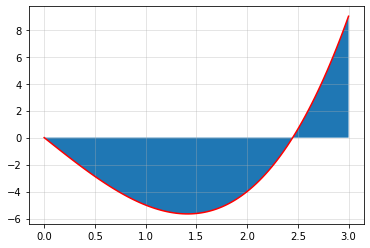

In [ ]:
from sympy import integrate

fx = x**3-6*x # Creando la función simbólica

Id2 = integrate(fx,(x,0,3))
display(Id2)

xx = np.linspace(0,3,100)
yy = lambdify(x,fx)(xx)

plt.grid(alpha=0.4)
plt.plot(xx,yy,'r')
plt.fill_between(xx,yy)

Cuando la expresión a integrar incluye más de una variable simbólica, es necesario especificar de manera explícita la variable respecto a la cual se integra, de lo contrario Python nos mostrará un error.

In [ ]:
from sympy.abc import a,b,c
from sympy import integrate

f = a*x**2+b*x+c
integrate(f,x)

a*x**3/3 + b*x**2/2 + c*x

En SymPy, también se puede calcular una integral definida mediante *integrate*, considerando el hecho que deben añadirse los límites de integración, mediante la sintaxis:

In [ ]:
from sympy import cos,pi
from sympy import integrate, init_printing
from sympy.abc import x

f = x**2 - 3*x + 2
ID = integrate(f)
ID

# o integrales definidas
Res1 = integrate(cos(x), (x,0,pi/2.0))
print("la integral definida de cos(x) entre 0 y pi/2 es {}".format(Res1))

Res2 = integrate(x, (x, 0, 5))
print("la integral definida de x entre 0 y 5 es {}".format(N(Res2)))

la integral definida de cos(x) entre 0 y pi/2 es 1
la integral definida de x entre 0 y 5 es 12.5000000000000


## Integrales múltiples

Aunque se van a resolver integrales dobles, la sintaxis y metodología se puede extrapolar de forma fácil a cualquier integral múltiple.

Para resolver
$$ \int_a^b \int_c^d 1 \ dy dx,$$

hay que recordar que este tipo de integrales dobles se pueden resolver de forma iterada
$$ I_1 = \int_c^d 1 \ dy  \Rightarrow I = \int_a^b I_1 dx.$$

En Python se puede realizar exactamente lo mismo

In [ ]:
from sympy.abc import x,y,z,a,b,c,d
from sympy import simplify

I1 = integrate(1, (y,c,d))
simplify(integrate(I1, (x,a,b)))

(a - b)*(c - d)

También existen funciones para el cálculo de integrales dobles, triples o múltiples. La mecánica para este tipo de integración se ha agrupado en las funciones *dblquad, tplquad* y *nquad*. Hay que remarcar, que los límites de todas las integrales internas deben definirse como funciones.

La sintaxis general de la función *dblquad* es *dblquad(func, a, b, gfun, hfun)*. Donde, *func* es el nombre de la función a integrar, *a* y *b* son los límites inferior y superior de la variable *x*, respectivamente, mientras que *gfun* y *hfun* son los nombres de las funciones que definen los límites inferior y superior de la variable *y*.

Como ejemplo, veamos el cálculo de la integral doble
$$\int_{0}^{1/2}\int_{0}^{\sqrt{1-4y^2}} 16xy \:dx dy$$


In [2]:
from scipy.integrate import dblquad

# definición de las funciones
def integrand(x, y):
  return 16*x*y

def xlimit(y):
  return sqrt(1-4*y**2)

i = dblquad(integrand, 0, 0.5, 0, xlimit)
print(i)

(0.49999999999999994, 1.7092350012594845e-14)


## Ejercicios

### Ejercicio 1
Dadas las funciones:

* $f(x)=x^2-2x+3$ en $[-2, 3]$
* $f(x)=sen(2x)$ en $[-1, 5]$
* $f(x)=-x^2+8x+5$ en $[-2, 3]$

calcula:
1.   El valor de la suma izquierda $Ln$ para $n=6$
2.   El valor de la suma derecha $Rn$ para $n=6$
3.   El valor de la suma trapezoidal STn para $n=6$
4.   Valor exacto de la integral (utilizar la función *quad*)
5.   El error relativo (Valor real menos valor aproximado y dividido por el valor real) para las tres aproximaciones.

In [ ]:
f1 = x**2-2*x+3
f2 = sin(2*x)
f3 = -x**2+8*x+5

# Sol 1 y 2

# Suma izq. y derec.
Ln1, Rn1 = Riemann_sum(f1,-2,3,6)
Ln2, Rn2 = Riemann_sum(f2,-1,5,6)
Ln3, Rn3 = Riemann_sum(f3,-2,3,6)

print("Resultado de 1) y 2)")
print(f'Suma izquierda: {Ln1:.4f}, suma derecha: {Rn1:.4f}')
print(f'Suma izquierda: {Ln2:.4f}, suma derecha: {Rn2:.4f}')
print(f'Suma izquierda: {Ln3:.4f}, suma derecha: {Rn3:.4f}')

# Suma trapezoidal
STn1 = suma_trapezoidal(f1,-2,3,6)
STn2 = suma_trapezoidal(f2,-1,5,6)
STn3 = suma_trapezoidal(f3,-2,3,6)

print("Resultado de 3)")
print(f'Suma trapezoidal: {STn1:.4f}')
print(f'Suma trapezoidal: {STn2:.4f}')
print(f'Suma trapezoidal: {STn3:.4f}')

# Quad
q1,e1 = quad(lambdify(x,f1),-2,3)
q2,e2 = quad(lambdify(x,f2),-1,5)
q3,e3 = quad(lambdify(x,f3),-2,3)

print("Resultado de 4)")
print(f'Integral con quad: {q1:.4f}')
print(f'Integral con quad: {q2:.4f}')
print(f'Integral con quad: {q3:.4f}')

# Error relativo
ER1L = (q1 - Ln1)/q1
ER1R = (q1 - Rn1)/q1
ER1S = (q1 - STn1)/q1

ER2L = (q2 - Ln2)/q2
ER2R = (q2 - Rn2)/q2
ER2S = (q2 - STn2)/q2

ER3L = (q3 - Ln3)/q3
ER3R = (q3 - Rn3)/q3
ER3S = (q3 - STn3)/q3

print("Resultado de 5)")
print("f1")
print(f'Error relativo con izq.: {ER1L:.4f}')
print(f'Error relativo con der.: {ER1R:.4f}')
print(f'Error relativo con tra.: {ER1S:.4f}')
print("f2")
print(f'Error relativo con izq.: {ER2L:.4f}')
print(f'Error relativo con der.: {ER2R:.4f}')
print(f'Error relativo con tra.: {ER2S:.4f}')
print("f3")
print(f'Error relativo con izq.: {ER3L:.4f}')
print(f'Error relativo con der.: {ER3R:.4f}')
print(f'Error relativo con tra.: {ER3S:.4f}')

Resultado de 1) y 2)
Suma izquierda: 20.8333, suma derecha: 16.6667
Suma izquierda: -0.1004, suma derecha: 0.2649
Suma izquierda: 12.5000, suma derecha: 41.6667
Resultado de 3)
Suma trapezoidal: 18.7500
Suma trapezoidal: 0.0822
Suma trapezoidal: 27.0833
Resultado de 4)
Integral con quad: 21.6667
Integral con quad: 0.2115
Integral con quad: 33.3333
Resultado de 5)
f1
Error relativo con izq.: 0.0385
Error relativo con der.: 0.2308
Error relativo con tra.: 0.1346
f2
Error relativo con izq.: 1.4749
Error relativo con der.: -0.2525
Error relativo con tra.: 0.6112
f3
Error relativo con izq.: 0.6250
Error relativo con der.: -0.2500
Error relativo con tra.: 0.1875


### Ejercicio 2 (Regla de Simpson)

La regla de Simpson consiste en aproximar la integral de una función $f$ con polinomios cuadráticos. Así, dada una partición $p$ del intervalo $[a, b]$ para algún número par $n$. En cada subintervalo, el área debajo de $f$ se aproxima con el área debajo de un polinomio cuadrático:
$$[ f(x_{i-1})+4f(x_{i})+f(x_{i+1}) ]\frac{\Delta x}{3} $$

Sumando estas áreas para todos los subintervalos obtenemos la aproximación de la integral:
$$\int_a^b f(x)dx =\sum_{i=2}^{n-1} [f(x_{i-1})+4f(x_{i})+f(x_{i+1})]\frac{\Delta x}{3}  = [f(x_{0})+4f(x_{1})+2f(x_{2})+4f(x_{3})+2f(x_{4})+...+4f(x_{n-1})+f(x_{n})]\frac{Δx}{3}$$

Implementa en python la Regla de Simpson y pruebala para las funciones del ejercicio 1.

In [ ]:
def simpson(f,a,b,n):
  Ax = (b-a)/n
  xx = np.linspace(a,b,n)
  yy = lambdify(x,f)(xx)

  xx = xx[~np.isnan(yy)] # Elimina todos los nan (ej. sqrt(-1))
  yy = yy[~np.isnan(yy)] # Elimina todos los nan (ej. sqrt(-1))

  # sum(yy[0:-1:2]) -> suma todos los numeros desde 0 hasta el (final-1) con saltos de 2 en 2 (saltos pares 0,2,4,6,8,...)
  # sum(4*yy[1::2]) -> suma el resultado de la multiplicación de todos los numeros desde 0 hasta el final con saltos de 2 en 2 (saltos impares 1,3,5,7,...)
  # sum(yy[2::2]) -> suma todos los numeros desde 2 hasta el final con saltos de 2 en 2 (saltos pares 2,4,6,8,...)
  simp = Ax/3 * (sum(yy[0:-1:2])+sum(4*yy[1::2])+sum(yy[2::2]))
  return simp

# mismo que el anterior
def simpson2(f,a,b,n):
  Ax = (b-a)/n
  xx = np.linspace(a,b,n)
  yy = lambdify(x,f)(xx)

  xx = xx[~np.isnan(yy)] # Elimina todos los nan (ej. sqrt(-1))
  yy = yy[~np.isnan(yy)] # Elimina todos los nan (ej. sqrt(-1))

  simp = 0
  for i in range(0,len(xx)-2,2):
    simp = simp + yy[i]+4*yy[i+1]+yy[i+2]
  return Ax/3 * simp

print("Metodo 1")
print(simpson(f1,-2,3,100))
print(simpson(f2,-1,5,100))
print(simpson(f3,-2,3,100))

print("Metodo 2")
print(simpson2(f1,-2,3,100))
print(simpson2(f2,-1,5,100))
print(simpson2(f3,-2,3,100))

Metodo 1
21.651683501683507
0.18656882638835265
33.66750841750842
Metodo 2
21.155007992381723
0.23886197018946814
32.00256776519402


### Ejercicio 3
Calcula:

1. $\int e^{4x} dx$
2. $\int x^{5} \log x dx$
3. $\int \cos (\sin x) dx$
4. $\int_{-1}^{1} x^2 \ dx$
5. $\int_{-\pi}^{\pi} \cos(x) \ dx$
6. $\int_{4}^{\infty} \frac{1}{x^2-5x+4} \ dx$

In [ ]:
# 1
e31=integrate(exp(4*x),x)
print("1)")
display(e31)

# 2
e32=integrate(x**5*log(x,10),x)
print()
print("2)")
display(e32)

# 3
e33=integrate(cos(sin(x)),x)
print()
print("3)")
display(e33)

# 4
e34=integrate(x**2,(x,-1,1))
print()
print("4)")
display(e34)

# 5
e35=integrate(cos(x),(x,-pi,pi))
print()
print("5)")
display(e35)

# 6
e36=integrate(1/(x**2-5*x+4),(x,4,oo))
print()
print("6)")
display(e36)

1)


exp(4*x)/4


2)


x**6*log(x)/(6*log(10)) - x**6/(36*log(10))


3)


Integral(cos(sin(x)), x)


4)


2/3


5)


0


6)


oo

### Ejercicio 4

Sean las funciones $f(x)=x$ y $g(x)=(x+1)^2$, calcula:
1. $\int_{0}^{2} (f+g) dx$
2. $\int_{0}^{2} f \ dx + \int_{0}^{2} g \ dx$

Compara los resultados.

In [ ]:
f4 = x
g4 = (x+1)**2

e41=integrate(f4+g4,(x,0,2))
display(e41)

e42=integrate(f4,(x,0,2))+integrate(g4,(x,0,2))
display(e42)

32/3

32/3

### Ejercicio 5

Sea la función $f(x)=\sin x$ y $k=5$, calcula:
1. $\int_{-\pi/2}^{\pi} k \ f \ dx$
2. $k \int_{-\pi/2}^{\pi} f \ dx $

Compara los resultados.

In [ ]:
f5 = sin(x)
k5 = 5

e51=integrate(k5*f5,(x,-pi/2,pi))
display(e51)

e52=k5*integrate(f5,(x,-pi/2,pi))
display(e52)

5

5

### Ejercicio 6

Calcula el área de la región limitada por las siguientes gráficas utilizando el método de Simpson con $\Delta x = (b-a)/n = 0.01$.
1. $y = x + 1$, con $0 \leq x \leq 1$
2. $y = x^2 + 1$, con $1 \leq x \leq 2$

Simpson: 1.4983501683501688
Exacta: 3/2


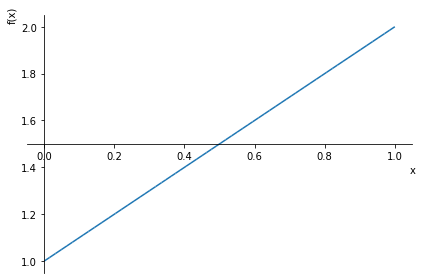

Simpson: 3.333400673400673
Exacta: 10/3


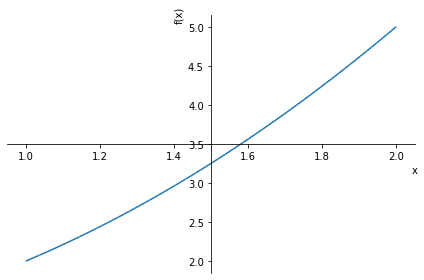

In [ ]:
# 1
n = int((1-0)/0.01)
e61 = simpson(x+1,0,1,n)
print(f"Simpson: {e61}")
print(f"Exacta: {integrate((x+1),(x,0,1))}")

symplot(x+1,(x,0,1))

# 2
n = int((2-1)/0.01)
e62 = simpson(x**2+1,1,2,n)
print(f"Simpson: {e62}")
print(f"Exacta: {integrate((x**2+1),(x,1,2))}")

symplot(x**2+1,(x,1,2))

### Ejercicio 7

Calcula el volumen del sólido de revolución generado al girar alrededor del eje $x$ las siguientes gráficas. Como en el ejercicio anterior utiliza el método de Simpson con $\Delta x = (b-a)/n = 0.01$ para obtener la integral definida correspondiente.

1. $y = \sqrt{x-1}$, la recta $x=3$ y el eje de ordenadas.
2. $y = 1-x^2$, y las rectas $x=-1$ y $x=1$.

In [ ]:
# 1
a = 0
b = 3
n = int((b-a)/0.01)
f71 = sqrt(x-1)
i71 = pi*integrate(f71**2,(x,a,b))
s71 = math.pi*simpson(f71,a,b,n)
print(f"Integral por revolución: {N(i71):.6f}, Simpson: {s71:.6f}")

# 2
a = -1
b = 1
n = int((b-a)/0.01)
f72 = 1 -x**2
i72 = pi*integrate(f72**2,(x,a,b))
s72 = math.pi*simpson(f72,a,b,n)
print(f"Integral por revolución: {N(i72):.6f}, Simpson: {s72:.6f}")

Integral por revolución: 4.712389, Simpson: 5.933310
Integral por revolución: 3.351032, Simpson: 4.167741


<string>:2: RuntimeWarning: invalid value encountered in sqrt


### Ejercicio 8

Calcula:
1. La integral doble $\iint \limits_{\mathbb{R}^{2}} \frac{x^2}{2y} dxdy$, con $1 \leq x \leq 2$ y $1 \leq y \leq 4$
2. La integral  triple $\iiint \limits_{\mathbb{Q}}  x^2 \sin(z) dxdydz$, con $0 \leq x \leq \sqrt{5}$,  $0 \leq y \leq 2\pi$ y  $0 \leq z \leq \arctan 2$
3. La integral doble $\iint \limits_{\mathbb{R}^{2}} xy dydx$, con $0 \leq x \leq 1$ y $1-x \leq y \leq 1-x^2$
4. La integral doble $\iint \limits_{\mathbb{R}^{2}} (x+y^3) dydx$, con $1 \leq x \leq 4$ y $x \leq y \leq x^2$
5. La integral doble $\iint \limits_{\mathbb{R}^{2}} dydx$, con $-1 \leq x \leq 3$ y $0 \leq y \leq x+2$
6. Calcular el volumen bajo la superficie $f(x,y) = 6-x-y$ en el rectángulo $[0, 3] \times [0, 2]$
7. Calcular el volumen bajo la superficie $f(x,y) = 6-x-y$ en el área del plano $XY$ delimitada por $0 \leq x \leq 1$ y $2x\leq y \leq -x^2+3$

In [ ]:
# 1
i81 = integrate(integrate(x**2/(2*y),(x,1,2)),(y,1,4))
print("1)")
print("Integral en relación a x: ", integrate(x**2/(2*y),(x,1,2)))
display(i81)

# 2
i82 = integrate(integrate(integrate(x**2*sin(z),(x,0,sqrt(5))),(y,0,2*pi)),(z,0,atan(2)))
print()
print("2)")
display(i82)

# 3
i83 = integrate(integrate(x*y,(y,1-x,1-x**2)),(x,0,1))
print()
print("3)")
display(i83)

# 4
i84 = integrate(integrate(x+y**3,(y,x,x**2)),(x,1,4))
print()
print("4)")
display(i84)

# 5
i85 = integrate(integrate(1,(y,0,x+2)),(x,-1,3))
print()
print("5)")
display(i85)

# 6
i86 = integrate(integrate(6-x-y,(y,0,3)),(x,0,2))
print()
print("6)")
display(i86)

# 7
i87 = integrate(integrate(6-x-y,(y,2*x,-x**2+3)),(x,0,1))
print()
print("7)")
display(i87)
#symplot(2*x,-x**2+3,(x,0,1))

1)
Integral en relación a x:  7/(6*y)


7*log(4)/6


2)


-10*pi/3 + 10*sqrt(5)*pi/3


3)


1/24


4)


145467/20


5)


12


6)


21


7)


389/60

### Ejercicio 9

Dada la función $ f(x,y)=x^2+4y^2$ se pide:
1. Representar la gráfica de la función en el rectángulo $[0, 2] \times [0, 1]$
2. Calcular el volumen del sólido limitado por el rectángulo $[0,2] \times [0,1]$ mediante una integral doble.

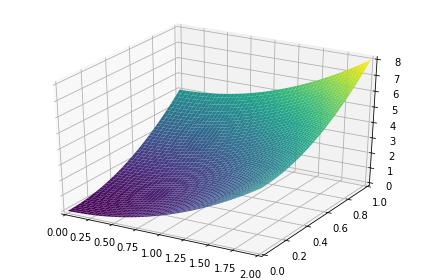

16/3

In [ ]:
f9 = x**2 + 4*y**2
from sympy.plotting import plot3d
plot3d(f9,(x,0,2),(y,0,1))

i9 = integrate(integrate(f9,(x,0,2)),(y,0,1))
display(i9)

In [3]:
lista = [1,1,2,3,3,2,2]
lista_valores = []
ocurrencias_valores = []

for i in lista:
  if i not in lista_valores:
    lista_valores.append(i)
    contador = 0
    for j in lista:
      if i == j :
        contador = contador + 1
    ocurrencias_valores.append(contador)
lista_valores
ocurrencias_valores

a1 = []
for (int i=0; i z l.lenght)

[2, 3, 2]